## **FIFA 21 DATA ANALYSIS**

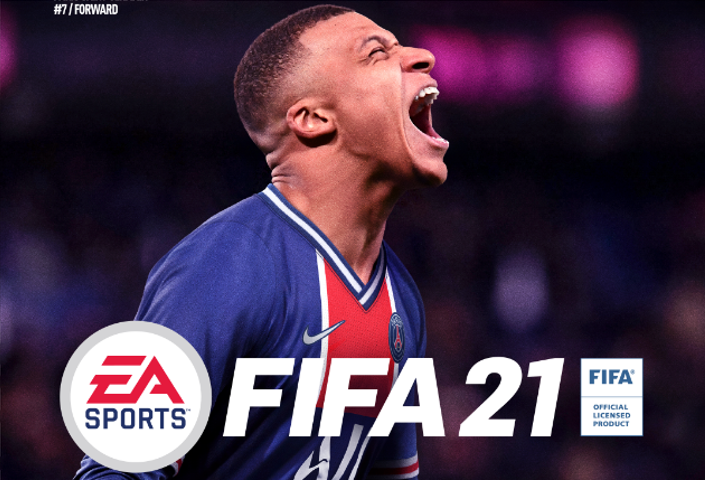

###### The topic for my STAT 5000 project is Soccer Data Analysis. The dataset I used for my project is a Kaggle dataset. The dataset consists of 18000+ rows and 106 columns describing various features.The dataset is a collection of various attributes of players from the FIFA 2021 game by EA Sports. This notebook is an in depth analysis of various attributes of player, how are they related to each other, some story telling through data visualizations and finally predicition of attributes. We will be answering some important questions through data analysis to get some useful insights from the dataset.

# **Data Exploration and Cleaning**

**Importing necessary libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

###### We will be using Numpy, Pandas, Matplotlib, Seabrorn and Sci-Kit Learn libraries.

**Reading the dataset**

In [9]:
fifa = pd.read_csv("players_21.csv")

###### The file is in CSV format.

**Checking the head of the dataset**

In [10]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,...,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,...,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


**Listing all the columns in the dataset**

In [11]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

**Removing irrelevant columns**

In [12]:
l = fifa[['sofifa_id','player_url','long_name','dob','real_face','body_type', 
          'player_tags','team_jersey_number','loaned_from',
        'contract_valid_until','nation_jersey_number','player_traits','ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb','nation_position','defending_marking','joined','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes']]
fifa = fifa.drop(labels = l, axis = 1)


###### Removed all the unecessary columns like long name, dob, player traits ls,st,rs,etc. They were not necessary as they depicted how would every player play at different positions.

In [13]:
fifa.head(2)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,138400000.0,CAM,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,75900000.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24


###### This is the cleaned dataset containing all the useful columns.

**Checking for columns that have null values**

In [14]:
null = fifa.isnull().sum()
print(null[null>0])

club_name               225
league_name             225
league_rank             225
release_clause_eur      995
team_position           225
pace                   2083
shooting               2083
passing                2083
dribbling              2083
defending              2083
physic                 2083
gk_diving             16861
gk_handling           16861
gk_kicking            16861
gk_reflexes           16861
gk_speed              16861
gk_positioning        16861
dtype: int64


**Removing all the null values in the columns**

In [15]:
fifa['club_name'] = fifa['club_name'].fillna('Free Agent')
fifa['league_name'] = fifa['league_name'].fillna('No League')
fifa['league_rank'] = fifa['league_rank'].fillna('No Rank')
fifa['team_position'] = fifa['team_position'].fillna('No Position')
fifa['release_clause_eur'] = fifa['release_clause_eur'].fillna(0)
fifa['pace'] = fifa['pace'].fillna(fifa['pace'].mean())
fifa['shooting'] = fifa['shooting'].fillna(fifa['shooting'].mean())
fifa['passing'] = fifa['passing'].fillna(fifa['passing'].mean())
fifa['defending'] = fifa['defending'].fillna(fifa['defending'].mean())
fifa['dribbling'] = fifa['dribbling'].fillna(fifa['dribbling'].mean())
fifa['physic'] = fifa['physic'].fillna(fifa['physic'].mean())

###### We inserted mean values wherever there were numerical missing values and called players having no clubs as 'Free Agents'.

In [16]:
null = fifa.isnull().sum()
print(null[null>0])

gk_diving         16861
gk_handling       16861
gk_kicking        16861
gk_reflexes       16861
gk_speed          16861
gk_positioning    16861
dtype: int64


###### There are too many missing values for Goalkeeper columns, so we leave them as it is.

**Generating Descriptive Statistics**

In [17]:
fifa.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,181.190773,75.016892,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.070695e+06,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,47.581767,45.546505
std,4.697354,6.825672,7.057140,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,9.838718e+06,10.363322,13.199766,9.692357,9.480136,15.476950,9.195223,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,21.402461,20.953997
min,16.000000,155.000000,50.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000e+00,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,5.000000,4.000000
25%,21.000000,176.000000,70.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,4.390000e+05,63.000000,44.000000,51.000000,58.000000,39.000000,59.000000,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,55.000000,57.000000,32.000000,44.000000,25.000000,40.000000,45.000000,38.750000,50.000000,27.000000,24.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,2.000000,1.000000e+06,67.668110,52.274954,57.139434,62.455430,52.000000,64.458988,65.000000,63.000000,61.000000,66.000000,37.000000,63.000000,54.000000,49.000000,55.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,65.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,59.000000,55.0

###### Describe() method will give you all the important statistics like mean, standard deviation, median and different percentiles. 

**Summary of the Dataframe**

In [18]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18944 non-null  object 
 1   age                         18944 non-null  int64  
 2   height_cm                   18944 non-null  int64  
 3   weight_kg                   18944 non-null  int64  
 4   nationality                 18944 non-null  object 
 5   club_name                   18944 non-null  object 
 6   league_name                 18944 non-null  object 
 7   league_rank                 18944 non-null  object 
 8   overall                     18944 non-null  int64  
 9   potential                   18944 non-null  int64  
 10  value_eur                   18944 non-null  int64  
 11  wage_eur                    18944 non-null  int64  
 12  player_positions            18944 non-null  object 
 13  preferred_foot              189

###### Info() will provide you a short summary of the dataset with the count of the rows and data types of the columns.

# **Exploratory Data Analysis**

**Countries having most number of players in the dataset**

Text(0, 0.5, 'Number of Players')

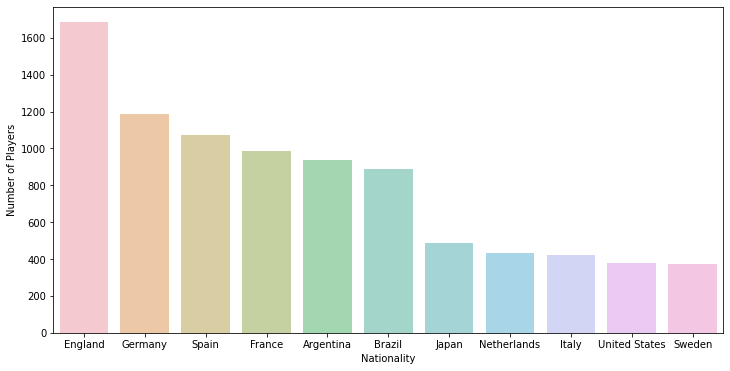

In [19]:
country = fifa['nationality'].value_counts()
country = country[0:11]
plt.figure(figsize = (12,6))
sns.barplot(x=country.index,y=country.values,alpha=0.5)
plt.xlabel("Nationality")
plt.ylabel("Number of Players")

###### As we can see from the barplot that England has the maximum number of players in the dataset followed by Germany, Spain, France, Argentina. Japan is the only Asian country in the top 10 which means soccer is not that prominent in Asia.


**Relation between Overall and the Age of the players**

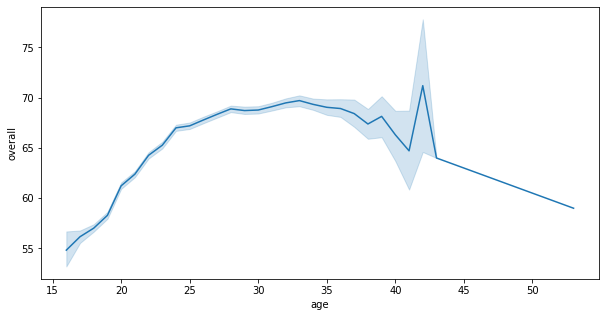

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='age',y='overall',data=fifa)

###### As you can see from the graph that as age goes on increasing the overall increases as well to a certain point. After 30 the graph gradually goes on decreasing. So as age goes on increasing the overall of a player goes on decreasing.

**Scouting out the youngest star in the dataset**

In [21]:
youngsters = fifa[fifa['age']==fifa['age'].min()]
you_over = youngsters[youngsters['overall'] == youngsters['overall'].max()]
best_potential = you_over[you_over['potential'] == you_over['potential'].max()]
best_potential[['short_name','nationality','age','potential','overall']]

,short_name,nationality,age,potential,overall
7314,R. Cherki,France,16,88,67


##### R.Cherki from France is the youngest and the best talent with a potential of 88.

**Best oldest player in the dataset**

In [22]:
old = fifa[fifa['age'] > 37]
best_old = old[old['overall'] == old['overall'].max()]
best_old[['short_name','nationality','age','overall']]

,short_name,nationality,age,overall
168,Z. Ibrahimović,Sweden,38,83


###### Zlatan Ibrahimovic is one of the finest old talent in the world of soccer. Currently he is playing for AC Milan and his age is 40. Playing for a top tier team in the age of 40 is a very big thing because Italian football is very competetive and tough.

**Dividing the dataset into Attackers, Midfield, Defenders and Goalkeepers and storing them in different Dataframes**

In [23]:
football = []
l=[]
for i in fifa['player_positions']:
  l.append(i.replace(" ",''))
for j in l:
  if 'ST' in j or 'CF' in j or'LW' in j or 'RW' in j:
    football.append("Forward")
  elif 'CAM'in j or 'CDM' in j or 'CM' in j or 'RM' in j or 'LM' in j:
    football.append('Midfield')
  elif 'GK' in j:
    football.append('Goalkeeper')
  elif 'CB' in j or 'RB' in j or 'LB' in j or 'LWB' in j or 'RWB' in j:
    football.append("Defender")  
fifa['Positions'] = football    

In [24]:
pos = fifa['Positions'].value_counts()

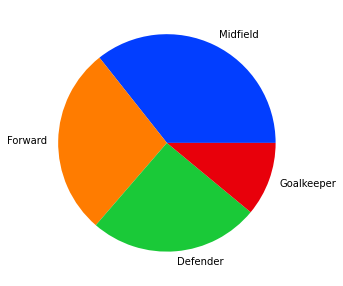

In [25]:
plt.figure(figsize = (10,5))
color = sns.color_palette('bright')
plt.pie(x = pos.values, labels = pos.index, colors = color  )
plt.show()

In [26]:
Attack = fifa[fifa['Positions'] == 'Forward']
Mid = fifa[fifa['Positions'] == 'Midfield']
Defence = fifa[fifa['Positions'] == 'Defender']
Goalkeepers = fifa[fifa['Positions'] == 'Goalkeeper']

###### This is a pie chart distribution of Attackers, Midfield, Defenders and Goalkeepers. We observe more number of Midfield in the dataset.

**Calculating the Mean Age of all the categories of the players**

In [27]:
Attack.nlargest(50,'age')['age'].mean()

38.1

In [28]:
Mid.nlargest(50,'age')['age'].mean()

37.4

In [29]:
Defence.nlargest(50,'age')['age'].mean()

37.32

In [30]:
Goalkeepers.nlargest(50,'age')['age'].mean()

39.04

###### From the above analysis we can conclude that Goalkeepers can play soccer for a longer time.

 **Age Distribution of Players**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


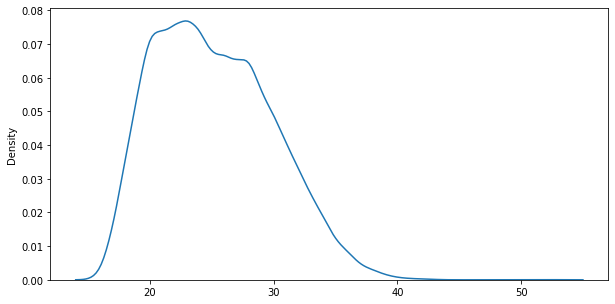

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(x=fifa['age'],hist=False)

###### Age has a normal distribution with a mean of 25.

**Calculation and Distribution of BMI**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


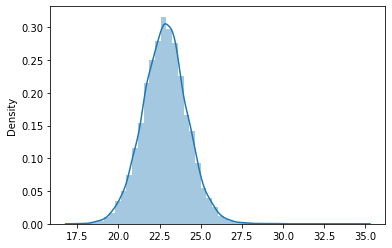

In [32]:
fifa['BMI'] = (fifa['weight_kg']*10000)/(fifa['height_cm']*fifa['height_cm'])
sns.distplot(x=fifa['BMI'],kde=True)

###### BMI also follows a normal distribution with a mean of 22.5. Most of the soccer players will have BMI between 20-24.9(according to Google).This is also evdient from the graph as well.

**Net Worth of top clubs in the world**

In [33]:
RealMadrid = fifa[fifa['club_name'] == 'Real Madrid']
Barca = fifa[fifa['club_name'] == 'FC Barcelona']
PSG = fifa[fifa['club_name'] == 'Paris Saint-Germain']
Manc = fifa[fifa['club_name'] == 'Manchester City']
Manu = fifa[fifa['club_name'] == 'Manchester United']
Liv = fifa[fifa['club_name'] == 'Liverpool']
Bayern = fifa[fifa['club_name'] == 'FC Bayern München']
Juve = fifa[fifa['club_name'] == 'Juventus']
Che = fifa[fifa['club_name'] == 'Chelsea']
ATM = fifa[fifa['club_name'] == 'Atlético Madrid']
valRM = RealMadrid['value_eur'].sum()
wageRM = RealMadrid['wage_eur'].sum()
valBAR = Barca['value_eur'].sum()
wageBAR = Barca['wage_eur'].sum()
valPSG = PSG['value_eur'].sum()
wagePSG = PSG['wage_eur'].sum()
valMC = Manc['value_eur'].sum()
wageMC = Manc['wage_eur'].sum()
valMU = Manu['value_eur'].sum()
wageMU = Manu['wage_eur'].sum()
valLIV = Liv['value_eur'].sum()
wageLIV = Liv['wage_eur'].sum()
valBM = Bayern['value_eur'].sum()
wageBM = Bayern['wage_eur'].sum()
valJUV = Juve['value_eur'].sum()
wageJUV = Juve['wage_eur'].sum()
valCHE = Che['value_eur'].sum()
wageCHE = Che['wage_eur'].sum()
valATM = ATM['value_eur'].sum()
wageATM = ATM['wage_eur'].sum()
values = [valRM,valBAR,valPSG,valMC,valMU,valLIV,valBM,valJUV,valCHE,valATM]
wages = [wageRM,wageBAR,wagePSG,wageMC,wageMU,wageLIV,wageBM,wageJUV,wageCHE,wageATM]

In [34]:
net = {'Name':['Real Madrid','FC Barcelona','Paris Saint Germain','Manchester City','Manchester United','Liverpool','Bayern Munchen',
       'Juventus','Chelsea','Athletico Madrid'],'Value':values,'Wages':wages}       
Net_worth = pd.DataFrame(data=net)
Net_worth['Value(in M)'] = Net_worth['Value']/1000000
Net_worth['Wages(in M)'] = Net_worth['Wages']/1000000
Net_worth

,Name,Value,Wages,Value(in M),Wages(in M)
0,Real Madrid,760850000,4848000,760.850,4.84800
1,FC Barcelona,722200000,4738000,722.200,4.73800
2,Paris Saint Germain,605675000,2125550,605.675,2.12555
3,Manchester City,747275000,3765000,747.275,3.76500
4,Manchester United,564130000,2950000,564.130,2.95000
5,Liverpool,840625000,3154000,840.625,3.15400
6,Bayern Munchen,609700000,1802000,609.700,1.80200
7,Juventus,524450000,2161000,524.450,2.16100
8,Chelsea,602275000,2698000,602.275,2.69800
9,Athletico Madrid,582500000,1597000,582.500,1.59700


**Players Value(in M) VS Wages paid by their clubs**

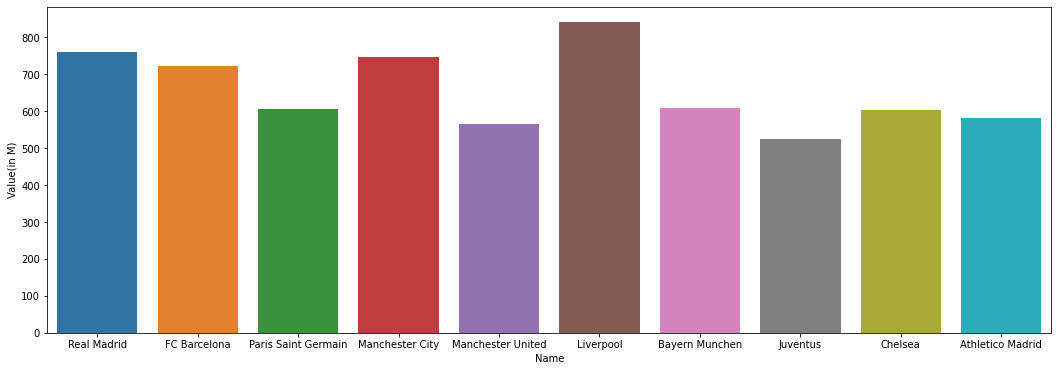

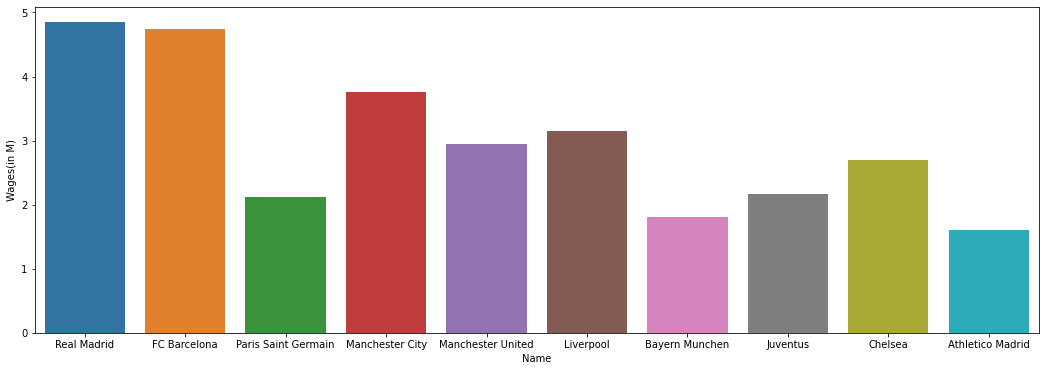

In [35]:
plt.figure(figsize = (18,6))
sns.barplot(x=Net_worth['Name'],y=Net_worth['Value(in M)'])
plt.show()
plt.figure(figsize = (18,6))
sns.barplot(x=Net_worth['Name'],y=Net_worth['Wages(in M)'])

###### Liverpool wins the race in Values of its players with the highest of 840.625 Millions. But the interesting fact is that Liverpool is not the leading club in terms of Wages. The stratergy which Liverpool used was that they bought players for a cheap transfer value and won the UEFA Champions League. So because of this Liverpool's player value increased drastically. But thier Wages remained same. Wages are depenedent on the price at which the players are bought from the transfer market. Real Madrid pays the highest Wages to their players.

**Forming my own 'DREAM TEAM'**

        LW            ST             RW

             LCM                RCM
                      CDM
  
       LB          LCB        RCB        RB           

                       GK                             

In [36]:
dtgoal = Goalkeepers[Goalkeepers['overall']>=85][['short_name','overall','team_position','age','potential','nationality','club_name','pace','shooting','passing','dribbling','defending']]
dtdef = Defence[Defence['overall']>=85][['short_name','overall','team_position','age','potential','nationality','club_name','pace','shooting','passing','dribbling','defending']]
dtmid = Mid[Mid['overall']>=85][['short_name','overall','team_position','age','potential','nationality','club_name','pace','shooting','passing','dribbling','defending']]
dtattack = Attack[Attack['overall']>=85][['short_name','overall','team_position','age','potential','nationality','club_name','pace','shooting','passing','dribbling','defending']]


In [37]:
dtgoal.head(5)

,short_name,overall,team_position,age,potential,nationality,club_name,pace,shooting,passing,dribbling,defending
2,J. Oblak,91,GK,27,93,Slovenia,Atlético Madrid,67.66811,52.274954,57.139434,62.45543,51.316292
7,M. ter Stegen,90,GK,28,93,Germany,FC Barcelona,67.66811,52.274954,57.139434,62.45543,51.316292
9,Alisson,90,GK,27,91,Brazil,Liverpool,67.66811,52.274954,57.139434,62.45543,51.316292
12,T. Courtois,89,GK,28,90,Belgium,Real Madrid,67.66811,52.274954,57.139434,62.45543,51.316292
16,M. Neuer,89,GK,34,89,Germany,FC Bayern München,67.66811,52.274954,57.139434,62.45543,51.316292


In [38]:
dtgoal = dtgoal[dtgoal['short_name'] == 'J. Oblak']

In [39]:
dtdef.head(5)

,short_name,overall,team_position,age,potential,nationality,club_name,pace,shooting,passing,dribbling,defending
8,V. van Dijk,90,LCB,28,91,Netherlands,Liverpool,76.0,60.0,71.0,71.0,91.0
14,Sergio Ramos,89,LCB,34,89,Spain,Real Madrid,71.0,70.0,76.0,73.0,88.0
26,K. Koulibaly,88,LCB,29,88,Senegal,Napoli,75.0,28.0,55.0,68.0,89.0
29,T. Alexander-Arnold,87,RB,21,92,England,Liverpool,80.0,66.0,87.0,80.0,80.0
31,A. Laporte,87,LCB,26,90,France,Manchester City,63.0,50.0,72.0,68.0,88.0


In [40]:
dtdef = dtdef[(dtdef['short_name'] == 'A. Robertson') | (dtdef['short_name'] == 'V. van Dijk')
      | (dtdef['short_name'] == 'R. Varane') | (dtdef['short_name'] == 'T. Alexander-Arnold') ]
    

In [41]:
dtmid.head(5)

,short_name,overall,team_position,age,potential,nationality,club_name,pace,shooting,passing,dribbling,defending
5,K. De Bruyne,91,RCM,29,91,Belgium,Manchester City,76.0,86.0,93.0,88.0,64.0
17,Casemiro,89,CDM,28,89,Brazil,Real Madrid,65.0,73.0,76.0,72.0,86.0
20,J. Kimmich,88,RDM,25,90,Germany,FC Bayern München,71.0,72.0,86.0,84.0,81.0
24,T. Kroos,88,LCM,30,88,Germany,Real Madrid,54.0,81.0,91.0,81.0,71.0
27,N. Kanté,88,RDM,29,88,France,Chelsea,77.0,66.0,76.0,81.0,86.0


In [42]:
dtmid = dtmid[(dtmid['short_name'] == 'T. Kroos') | (dtmid['short_name'] == 'K. De Bruyne')| (dtmid['short_name'] == 'Casemiro')]

In [43]:
dtattack.head(5)

,short_name,overall,team_position,age,potential,nationality,club_name,pace,shooting,passing,dribbling,defending
0,L. Messi,93,CAM,33,93,Argentina,FC Barcelona,85.0,92.0,91.0,95.0,38.0
1,Cristiano Ronaldo,92,LS,35,92,Portugal,Juventus,89.0,93.0,81.0,89.0,35.0
3,R. Lewandowski,91,ST,31,91,Poland,FC Bayern München,78.0,91.0,78.0,85.0,43.0
4,Neymar Jr,91,LW,28,91,Brazil,Paris Saint-Germain,91.0,85.0,86.0,94.0,36.0
6,K. Mbappé,90,LS,21,95,France,Paris Saint-Germain,96.0,86.0,78.0,91.0,39.0


In [44]:
dtattack = dtattack[(dtattack['short_name'] == 'Neymar Jr') | (dtattack['short_name'] == 'R. Lewandowski')| (dtattack['short_name'] == 'M. Salah')]

In [45]:
DreamTeam = pd.concat([dtattack,dtmid,dtdef,dtgoal],ignore_index=True)

In [46]:
DreamTeam

,short_name,overall,team_position,age,potential,nationality,club_name,pace,shooting,passing,dribbling,defending
0,R. Lewandowski,91,ST,31,91,Poland,FC Bayern München,78.00000,91.000000,78.000000,85.00000,43.000000
1,Neymar Jr,91,LW,28,91,Brazil,Paris Saint-Germain,91.00000,85.000000,86.000000,94.00000,36.000000
2,M. Salah,90,RW,28,90,Egypt,Liverpool,93.00000,86.000000,81.000000,90.00000,45.000000
3,K. De Bruyne,91,RCM,29,91,Belgium,Manchester City,76.00000,86.000000,93.000000,88.00000,64.000000
4,Casemiro,89,CDM,28,89,Brazil,Real Madrid,65.00000,73.000000,76.000000,72.00000,86.000000
5,T. Kroos,88,LCM,30,88,Germany,Real Madrid,54.00000,81.000000,91.000000,81.00000,71.000000
6,V. van Dijk,90,LCB,28,91,Netherlands,Liverpool,76.00000,60.000000,71.000000,71.00000,91.000000
7,T. Alexander-Arnold,87,RB,21,92,England,Liverpool,80.00000,66.000000,87.000000,80.00000,80.000000
8,A. Robertson,87,LB,26,89,Scotland,Liverpool,82.00000,62.000000,80.000000,80.00000,81.000000
9,R. Varane,86,RCB,27,88,France,Real Madrid,82.00000,49.000000,64.000000,64.00000,87.000000


**Mean Age and Mean of my Dream Team**

In [47]:
DreamTeam['overall'].mean()

89.18181818181819

In [48]:
DreamTeam['age'].mean()

27.545454545454547

**Distribution of Age and Overall of the players in the Dream Team**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


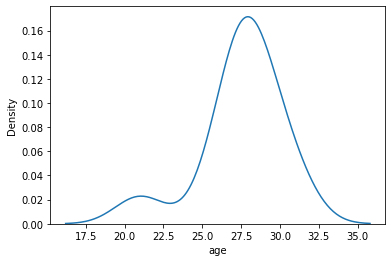

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


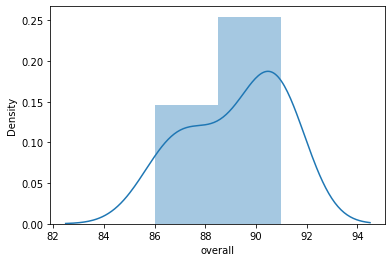

In [49]:
sns.distplot(a=DreamTeam['age'],hist=False)
plt.show()
sns.distplot(a=DreamTeam['overall'])

**Most number of players from any country and club**

In [50]:
dtclub = DreamTeam['club_name'].value_counts()
dtcountry = DreamTeam['nationality'].value_counts()

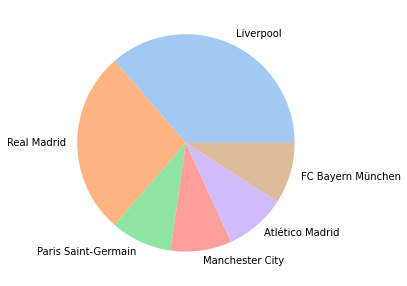

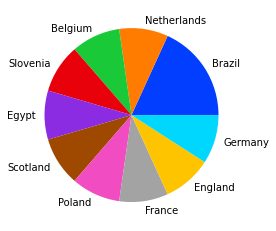

In [51]:
plt.figure(figsize = (10,5))
col = sns.color_palette(palette='pastel')
colo = sns.color_palette(palette='bright')
plt.pie(x= dtclub.values,labels = dtclub.index,colors = col)
plt.show()
plt.pie(x=dtcountry.values,labels=dtcountry.index,colors=colo)
plt.show()

###### My Dream Team contains maximum number of players from Liverpool.

**Plotting important attributes according to Attackers, Midfield, Defenders**

In [52]:
Defdt = DreamTeam.iloc[6:10]
MDefdt = Defdt[['pace','shooting','passing','dribbling','defending']].mean()
Middt = DreamTeam.iloc[3:6]
MMiddt = Middt[['pace','shooting','passing','dribbling','defending']].mean()
Attackdt = DreamTeam.iloc[0:3]
MAttackdt = Attackdt[['pace','shooting','passing','dribbling','defending']].mean()

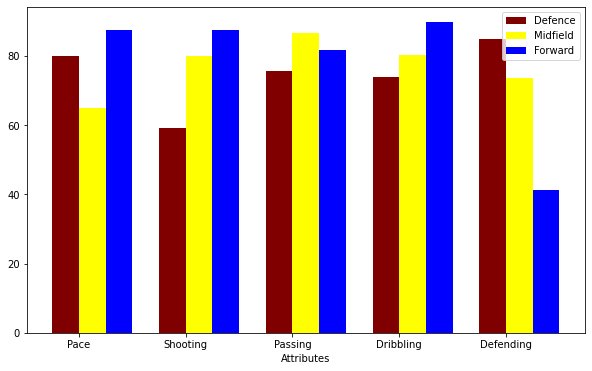

In [53]:
mvaldef = list(MDefdt.values)
mvalmid = list(MMiddt.values)
mvalatt = list(MAttackdt.values)
plt.figure(figsize = (10,6))
N=5
r = np.arange(N)
width = 0.25
bar1 =plt.bar(r,mvaldef,width = 0.25,color = 'maroon',label='Defence')
bar2 = plt.bar(r+width,mvalmid,width = 0.25,color='yellow',label='Midfield')
bar3 = plt.bar(r+width*2,mvalatt,width = 0.25,color='blue',label='Forward')
plt.xlabel('Attributes')
plt.xticks(r + width/2,['Pace','Shooting','Passing','Dribbling','Defending'])
plt.legend()
plt.show()



###### 1) Forwards should have good pace. This is evident form our graph.
###### 2) Shooting and finishing skills should be prominent in Forwards.

###### 3) Midfield should be excellent in Passing.

###### 4) Forwards again beat others in Dribbling skills.

###### 5) Its pretty obvious that Defenders have to be the best in Defending.






**Exploratory Data Analysis on Goalkeepers**

**Creating a Goalkeeper Dataset**

In [54]:
Goalkeepers.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality',
       'club_name', 'league_name', 'league_rank', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggr

In [55]:
Keeper = ['player_positions', 'preferred_foot','international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting','passing', 'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle','Positions','league_rank',]

In [56]:
Goalkeeper = Goalkeepers.drop(labels = Keeper, axis = 1)

**Visualizing Correlation between attributes for top 100 Goalkeepers**

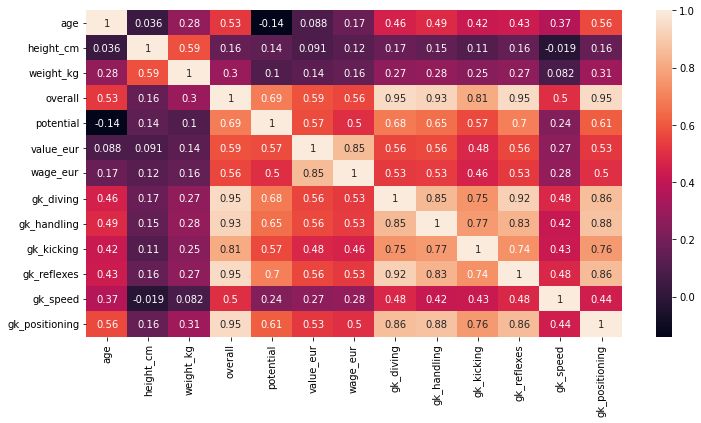

In [57]:
plt.figure(figsize = (12,6))
sns.heatmap(Goalkeeper.corr(),annot = True)

**Relation between Age and Player Value in Euros**

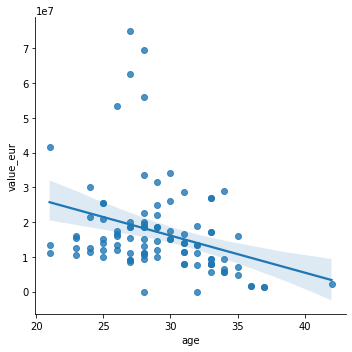

In [58]:
goal = Goalkeeper['overall'].nlargest(100)
top100 = Goalkeeper.loc[goal.index]
sns.lmplot(x='age',y='value_eur',data=top100)

###### As the age increases the value of a goalkeeper decreases.

**Relation between Age and Golakeeper Reflexes**

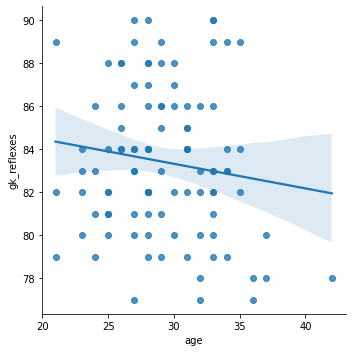

In [59]:
sns.lmplot(x='age',y='gk_reflexes',data=top100)

###### Goalkeeper Reflexes decrease as the age increases.

**Relation between Age and Goalkeeper Speed**

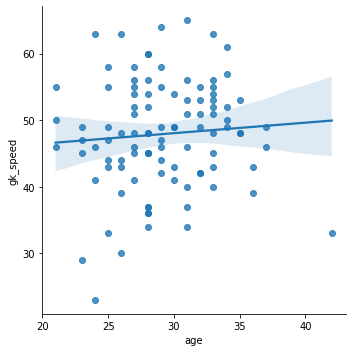

In [60]:
sns.lmplot(x='age',y='gk_speed',data=top100)

###### Overall trend observed was a constant. Goalkeeper speed is not dependent on his Age. This some what makes sense as Goalkeepers have to save the ball from entering the goal and not score any goals.

**Chi Square Test for various Categorical Features**

###### For chi-square distribution we require categorical variables. So we decided to implement a chi-square test on the categorical variables present in the dataset. Chi-Square test is mainly used for Feature Importance. We want to calculate feature importance with respect to the Overall of the player. So I decided to convert Overall to a categorical variable and apply a Chi-Square test on the variables.

In [61]:
fifa.loc[(fifa['overall']<50,'Overall_Desc')] = 'Poor'
fifa.loc[(fifa['overall']>=50) & (fifa['overall']<=69.9),'Overall_Desc'] = 'Below Average'
fifa.loc[(fifa['overall']>=70) & (fifa['overall']<=79.9),'Overall_Desc'] = 'Average'
fifa.loc[(fifa['overall']>=80) & (fifa['overall']<89.9),'Overall_Desc'] = 'Good'
fifa.loc[(fifa['overall']>=90) & (fifa['overall']<100),'Overall_Desc'] = 'Best'

In [62]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['weak_foot','preferred_foot','international_reputation','skill_moves','work_rate','Overall_Desc']
categ = pd.DataFrame(data = fifa, columns=col)
categ['weak_foot'] = le.fit_transform(categ['weak_foot'])
categ['preferred_foot'] = le.fit_transform(categ['preferred_foot'])
categ['work_rate'] = le.fit_transform(categ['work_rate'])
categ['Overall_Desc'] = le.fit_transform(categ['Overall_Desc'])
X = categ.drop('Overall_Desc',axis = 1)
Y = categ['Overall_Desc']

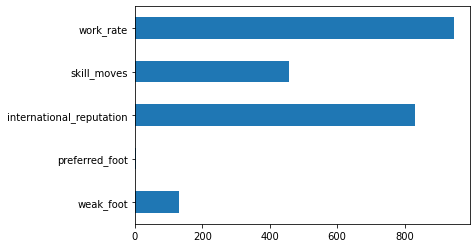

In [63]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,Y)
chi_scores = pd.Series(chi_scores[0], index = X.columns)
chi_scores.plot(kind = 'barh')

###### We selected 5 best categorical features that affected the 'Overall' the most. Work Rate is the best parameter to decide the Overall of a player. Work rate is followed by international reputation. International Reputation is of utmost importance as well depicting how a player plays for his own country. Preferred foot is of no use as it does not make any sense with which foot a player plays.

**Pearson Correlation between various important Features**

,age,height_cm,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
age,1.000000,0.089297,0.468197,-0.168214,0.222164,0.312271,0.168493,0.234109,0.404695,0.127915,0.082528,0.148629,0.147002,0.139521,0.027099,0.141459,0.182622,0.188678,0.094226,0.267956,0.202541,0.121206,0.350908,0.156099
height_cm,0.089297,1.000000,0.031579,-0.369787,-0.175334,-0.247290,-0.344262,0.189149,0.442275,-0.487854,-0.371722,0.012558,-0.353814,-0.343877,-0.479083,-0.438664,-0.402411,-0.318615,-0.410529,-0.158181,-0.002795,-0.283207,0.529385,-0.379300
overall,0.468197,0.031579,1.000000,0.188862,0.454391,0.662090,0.596558,0.333616,0.493539,0.410530,0.325413,0.327239,0.502191,0.374330,0.378455,0.420495,0.385617,0.487147,0.449372,0.558372,0.282440,0.381869,0.358049,0.407525
pace,-0.168214,-0.369787,0.188862,1.000000,0.350496,0.294917,0.541006,-0.286393,-0.180699,0.315519,0.287464,-0.172865,0.094084,0.238581,0.320611,0.277243,0.172614,0.048670,0.193036,0.215542,0.032880,0.179436,-0.300066,0.229682
shooting,0.222164,-0.175334,0.454391,0.350496,1.000000,0.654703,0.769547,-0.402365,0.020286,0.365566,0.753205,0.047090,0.320596,0.686418,0.464997,0.555318,0.529931,0.277961,0.397779,0.810232,-0.028292,0.140138,-0.031963,0.709929
passing,0.312271,-0.247290,0.662090,0.294917,0.654703,1.000000,0.834238,0.173119,0.164542,0.597197,0.424693,0.018609,0.557348,0.460477,0.478467,0.616756,0.609378,0.651050,0.466566,0.617167,-0.011254,0.278456,-0.039611,0.544656
dribbling,0.168493,-0.344262,0.596558,0.541006,0.769547,0.834238,1.000000,-0.142760,-0.005488,0.537464,0.556242,-0.036524,0.437664,0.538344,0.595984,0.595232,0.518969,0.432517,0.502123,0.626448,-0.017518,0.232559,-0.170905,0.576198
defending,0.234109,0.189149,0.333616,-0.286393,-0.402365,0.173119,-0.142760,1.000000,0.551949,0.072896,-0.397700,0.220852,0.185412,-0.291382,-0.118332,-0.074266,-0.030111,0.320839,0.001918,-0.141436,0.233794,0.245052,0.345165,-0.187946
physic,0.404695,0.442275,0.493539,-0.180699,0.020286,0.164542,-0.005488,0.551949,1.000000,0.022720,-0.053713,0.408769,0.180037,0.001407,-0.023829,0.002689,0.015031,0.204556,0.086931,0.202177,0.435904,0.398834,0.843849,0.052076
attacking_crossing,0.127915,-0.487854,0.410530,0.315519,0.365566,0.597197,0.537464,0.072896,0.022720,1.000000,0.671433,0.483909,0.804440,0.693095,0.864583,0.839114,0.763700,0.746818,0.841641,0.527564,0.125847,0.678117,-0.015983,0.746340


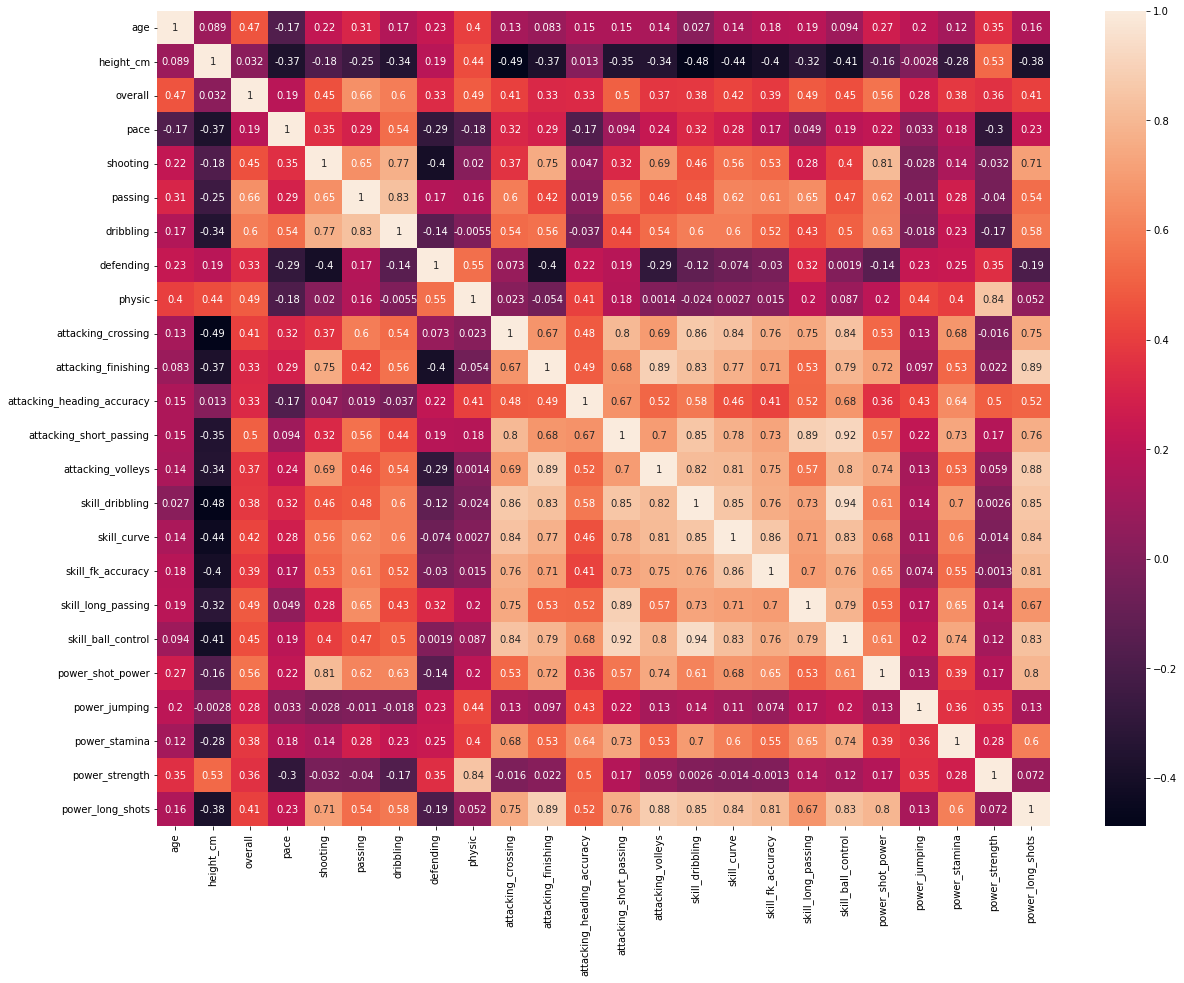

In [64]:
pearson = fifa[['age','height_cm','overall','pace','shooting','passing','dribbling','defending','physic','attacking_crossing',
'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
'skill_fk_accuracy','skill_long_passing','skill_ball_control','power_shot_power','power_jumping','power_stamina',
'power_strength','power_long_shots']]
plt.figure(figsize = (20,15))
sns.heatmap(pearson.corr(),annot = True)
pearson.corr()

###### The above Heatmap shows the Pearson Correlation between various features of the dataset.

# **Prediciton and Modelling**

**Predciting the Player Value in Euros using Linear Regression**

In [65]:
fifa['value_eur'] = fifa['value_eur'] / 1000000

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = pearson.drop('height_cm',axis = 1)
y = fifa['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print('Slopes :',lr.coef_)
print('Intercept',lr.intercept_)

Slopes : [-2.85606930e-01  5.59571539e-01  6.72547872e-03  1.01874877e-01
  1.68531290e-02 -9.17910458e-02  8.14693094e-03 -4.33222211e-03
 -2.12886366e-02 -2.27885257e-02 -6.35568000e-04  5.09519529e-03
  2.21154218e-02  3.22105381e-02  1.51560081e-02 -2.95634679e-04
  1.02962583e-02  2.82033945e-03 -4.03250555e-02  2.40788774e-03
 -3.63271556e-03 -1.57494500e-02 -3.58395022e-02]
Intercept -25.678650273766582


In [67]:
from sklearn import metrics
print("Mean Squared Error:",metrics.mean_squared_error(y_test,predict))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,predict))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Squared Error: 15.593645526525657
Mean Absolute Error: 2.018147291607448
Root Mean Squared Error: 3.9488790215104914


###### We decided to predict the Player Value in Euros using Linear Regression. Used the Linear Regression model form the Sci-Kit Learn package. We also used the Train-Test-Split as well as different metrics from Sci-Kit Learn to check the accuracy. We observed that the mean squared error came up to be 15.59, mean absolute error was 2.018 and the root mean squared error was 3.94887. We did pretty well in terms of error. 

###### Resources-
Dataset - https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

Libraries - https://scikit-learn.org/stable/,
https://seaborn.pydata.org/,https://matplotlib.org/,
https://pandas.pydata.org/,https://numpy.org/





